# Introduction to Topic Modeling with Non-negative Matrix Factorization

In [1]:
# imports

from sklearn.decomposition import NMF
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
%matplotlib inline

## Inferring topics from the 20 Newsgroups Dataset

In [2]:
pd.options.display.max_colwidth = 150
df = pd.read_table('newsgroups_train.tsv', usecols=['text', 'label'])
df.dropna(subset=['text'], inplace=True)
df.head()

,text,label
0,"\n I doubt there are good prospects for a self armoring system\nfor venus surface conditions (several hundred degrees, very high\npressure of CO...",sci.space
1,"\nI certainly do use it whenever I have to do TIFF, and it usually works\nvery well. That's not my point. I'm >philosophically< opposed to it\nb...",comp.graphics
2,excuse me for my ignorance. But I remember reading once that the \nBiblical tribe known as the Philistines still exists...they are the modern \nda...,alt.atheism
3,"\nSee:\n Maureen Stone and Tony DeRose,\n ""A Geometric Characterization of Parametric Cubic Curves"",\n ACM TOG, vol 8, no 3, July 1989, pp. ...",comp.graphics
4,\nI don't think you're going to be able to see the differences from a sphere\nunless they are greatly exaggerated. Even the equatorial bulge is o...,sci.space


In [3]:
df['label'].value_counts(normalize=True)

sci.space        0.357143
comp.graphics    0.352217
alt.atheism      0.290640
Name: label, dtype: float64

## TfIdf Feature Extraction

In [4]:
# Feature extraction

vect = TfidfVectorizer(stop_words='english')
X = vect.fit_transform(df['text'].tolist())

In [5]:
# Tfidf Features

X

<1624x23297 sparse matrix of type '<class 'numpy.float64'>'
	with 106580 stored elements in Compressed Sparse Row format>

In [6]:
pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

,00,000,0000,00000,000000,000005102000,000062david42,000100255pixel,00041032,0004136,...,zurbrin,zurich,zus,zvi,zwaartepunten,zwak,zwakke,zware,zwarte,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## NMF Decomposition

In [9]:
nmf = NMF(n_components=3)
W = nmf.fit_transform(X)  # Document-topic matrix
H = nmf.components_       # Topic-term matrix

/home/jaidevd/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


In [10]:
W.shape

(1624, 3)

In [11]:
H.shape

(3, 23297)

In [12]:
# Matrix W

W = pd.DataFrame(W, columns=['Topic 1', 'Topic 2', 'Topic 3'],
                 index=[f'Doc {i}' for i in range(X.shape[0])])
W

,Topic 1,Topic 2,Topic 3
Doc 0,0.002646,0.016109,0.019832
Doc 1,0.085327,0.036634,0.000000
Doc 2,0.009813,0.024435,0.010443
Doc 3,0.011656,0.000000,0.006426
Doc 4,0.011418,0.035553,0.002242
...,...,...,...
Doc 1619,0.048998,0.015202,0.001725
Doc 1620,0.025731,0.000000,0.000000
Doc 1621,0.014018,0.035019,0.044048
Doc 1622,0.032289,0.000000,0.019126


In [13]:
W['max_topic'] = W.apply(lambda x: x.idxmax(), axis=1)
W

,Topic 1,Topic 2,Topic 3,max_topic
Doc 0,0.002646,0.016109,0.019832,Topic 3
Doc 1,0.085327,0.036634,0.000000,Topic 1
Doc 2,0.009813,0.024435,0.010443,Topic 2
Doc 3,0.011656,0.000000,0.006426,Topic 1
Doc 4,0.011418,0.035553,0.002242,Topic 2
...,...,...,...,...
Doc 1619,0.048998,0.015202,0.001725,Topic 1
Doc 1620,0.025731,0.000000,0.000000,Topic 1
Doc 1621,0.014018,0.035019,0.044048,Topic 3
Doc 1622,0.032289,0.000000,0.019126,Topic 1


In [14]:
# Matrix H

H = pd.DataFrame(H, index=['Topic 1', 'Topic 2', 'Topic 3'], columns=vect.get_feature_names())
H

,00,000,0000,00000,000000,000005102000,000062david42,000100255pixel,00041032,0004136,...,zurbrin,zurich,zus,zvi,zwaartepunten,zwak,zwakke,zware,zwarte,zyxel
Topic 1,0.027651,0.008428,0.001283,0.002566,0.000000,0.000415,0.000079,0.004858,0.001283,0.000681,...,0.000000,0.000415,0.000000,0.000415,0.000000,0.000000,0.000000,0.000000,0.000000,0.003023
Topic 2,0.000000,0.007573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.002201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Topic 3,0.032574,0.063113,0.003155,0.006310,0.001494,0.000035,0.000871,0.000000,0.003155,0.001661,...,0.001171,0.000035,0.000000,0.000035,0.000063,0.000063,0.000063,0.000063,0.000126,0.000414


## Words for each topic

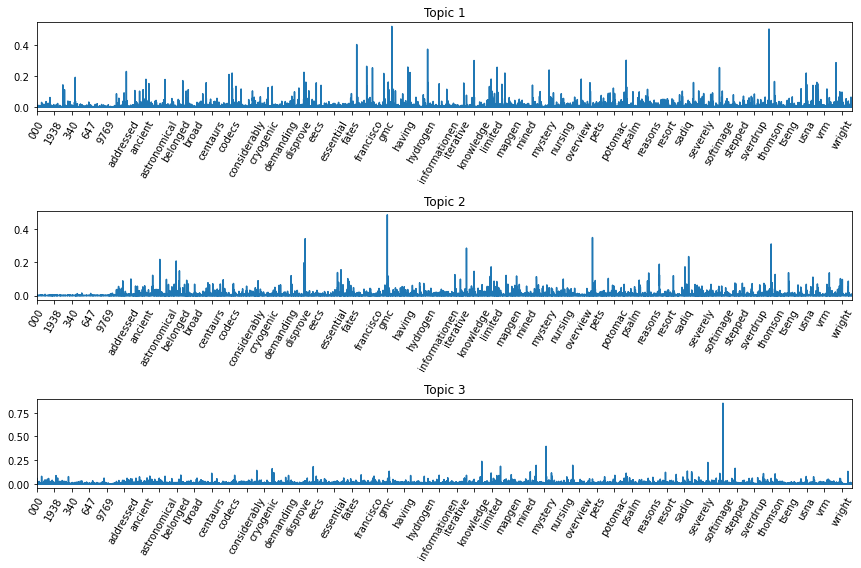

In [15]:
from warnings import filterwarnings
filterwarnings('ignore')

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
words = vect.get_feature_names()
xticks = np.arange(H.shape[1])[1::500]
xticklabels = words[1::500]
for i in range(3):
    H.loc[f'Topic {i+1}'].plot(ax=ax[i])
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(xticklabels, rotation=60)
    ax[i].set_title(f'Topic {i + 1}')
plt.tight_layout()

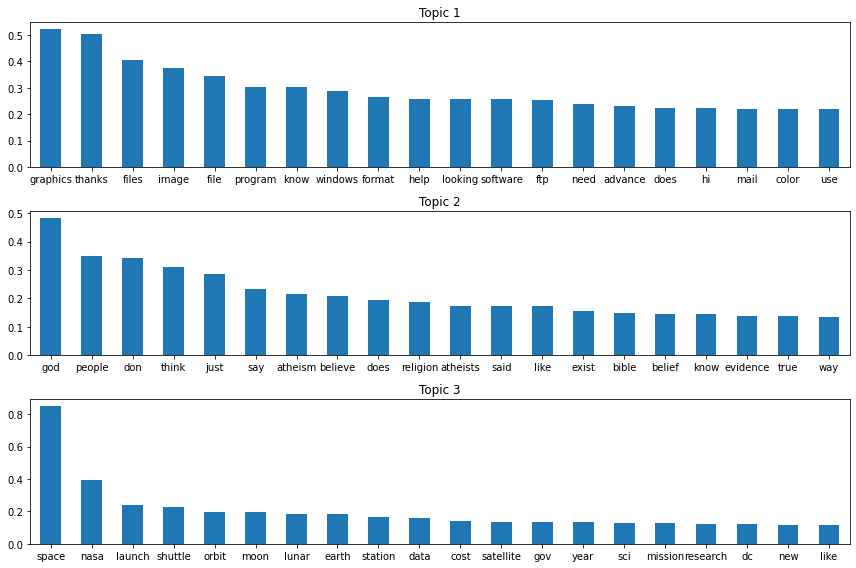

In [17]:
# Top words for each topic

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
for i in range(3):
    words = H.loc[f'Topic {i + 1}'].sort_values(ascending=False)[:20]
    words.plot(ax=ax[i], kind='bar', rot=0)
    ax[i].set_title(f'Topic {i + 1}')

plt.tight_layout()

In [18]:
# What were the original topics?

df['label'].unique()

array(['sci.space', 'comp.graphics', 'alt.atheism'], dtype=object)

In [19]:
# Fill in the correct mapping

topic_mapping = {
    'Topic 1': 'comp.graphics',
    'Topic 2': 'alt.atheism',
    'Topic 3': 'sci.space'
}

In [20]:
W

,Topic 1,Topic 2,Topic 3,max_topic
Doc 0,0.002646,0.016109,0.019832,Topic 3
Doc 1,0.085327,0.036634,0.000000,Topic 1
Doc 2,0.009813,0.024435,0.010443,Topic 2
Doc 3,0.011656,0.000000,0.006426,Topic 1
Doc 4,0.011418,0.035553,0.002242,Topic 2
...,...,...,...,...
Doc 1619,0.048998,0.015202,0.001725,Topic 1
Doc 1620,0.025731,0.000000,0.000000,Topic 1
Doc 1621,0.014018,0.035019,0.044048,Topic 3
Doc 1622,0.032289,0.000000,0.019126,Topic 1


In [22]:
actual_topics = df['label']
actual_topics

0           sci.space
1       comp.graphics
2         alt.atheism
3       comp.graphics
4           sci.space
            ...      
1652    comp.graphics
1653    comp.graphics
1654        sci.space
1655        sci.space
1656        sci.space
Name: label, Length: 1624, dtype: object

In [23]:
nmf_topics = W['max_topic'].map(lambda x: topic_mapping[x])
nmf_topics

Doc 0           sci.space
Doc 1       comp.graphics
Doc 2         alt.atheism
Doc 3       comp.graphics
Doc 4         alt.atheism
                ...      
Doc 1619    comp.graphics
Doc 1620    comp.graphics
Doc 1621        sci.space
Doc 1622    comp.graphics
Doc 1623        sci.space
Name: max_topic, Length: 1624, dtype: object

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(actual_topics, nmf_topics)

0.8146551724137931